# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [2]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

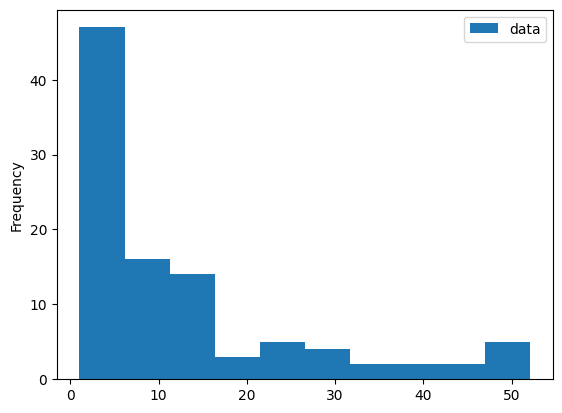

In [3]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

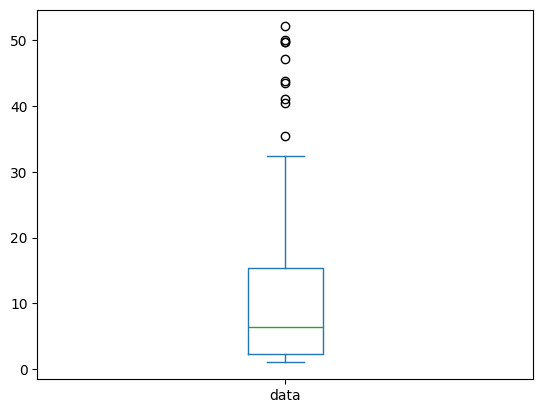

In [4]:
df.plot.box()

Both the histogram and boxplot are useful for understanding the distribution of drug prices at the pharmacy, but they serve different purposes.
Histogram

The histogram gives a clear view of how drug prices are distributed. Most of the prices seem to be on the lower end, while a few are much higher. This makes it easy to see where most of the prices fall and how spread out they are. However, the histogram doesn’t highlight specific outliers, and the way the bins are grouped can affect how the data looks.
Boxplot

The boxplot, on the other hand, is great for summarizing key statistics. It shows the median price, the range of most prices, and highlights any unusually expensive drugs as outliers. This makes it especially useful for answering the administrator’s question about high-priced drugs. However, it doesn’t give as much detail about the frequency of different price ranges as the histogram does.
Which One is Better?

If the goal is to understand how much more expensive the costly drugs are compared to the others, the boxplot is the better choice because it directly highlights outliers and shows the range of prices at a glance.
How to Improve the Visualization?

- For the histogram, adjusting the bin size could make it easier to see patterns. Adding a log scale for the x-axis might also help if there’s a big gap between cheap and expensive drugs.
- For the boxplot, adding labels for the median and quartiles would make it easier to read. Using a different color for outliers could also help them stand out more.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

# NFL First and Future Analysis

In [5]:
import pandas as pd

injury_file = "/Users/chrismckee/Downloads/nfl_injury_list.csv"
df_injury = pd.read_csv(injury_file)

play_list_file = "/Users/chrismckee/Downloads/nfl_play_list.csv"
df_play_list = pd.read_csv(play_list_file)

df_injury["PlayerKey"] = df_injury["PlayerKey"].astype(str)
df_injury["GameID"] = df_injury["GameID"].astype(str)
df_injury["PlayKey"] = df_injury["PlayKey"].astype(str)

df_play_list["PlayerKey"] = df_play_list["PlayerKey"].astype(str)
df_play_list["GameID"] = df_play_list["GameID"].astype(str)
df_play_list["PlayKey"] = df_play_list["PlayKey"].astype(str)

df_merged = df_injury.merge(df_play_list, on=["PlayerKey", "GameID", "PlayKey"], how="left")

df_merged.to_csv("merged_nfl_injury_data.csv", index=False)

print(df_merged.head())


  PlayerKey   GameID     PlayKey BodyPart    Surface  DM_M1  DM_M7  DM_M28  \
0     39873  39873-4  39873-4-32     Knee  Synthetic      1      1       1   
1     46074  46074-7  46074-7-26     Knee    Natural      1      1       0   
2     36557  36557-1  36557-1-70    Ankle  Synthetic      1      1       1   
3     46646  46646-3  46646-3-30    Ankle    Natural      1      0       0   
4     43532  43532-5  43532-5-69    Ankle  Synthetic      1      1       1   

   DM_M42 RosterPosition  PlayerDay  PlayerGame       StadiumType  FieldType  \
0       1     Linebacker       29.0         4.0           Indoors  Synthetic   
1       0     Linebacker       50.0         7.0              Open    Natural   
2       1         Safety        1.0         1.0           Outdoor  Synthetic   
3       0     Linebacker       15.0         3.0           Outdoor    Natural   
4       1  Wide Receiver       32.0         5.0  Retractable Roof  Synthetic   

   Temperature         Weather PlayType  PlayerGam

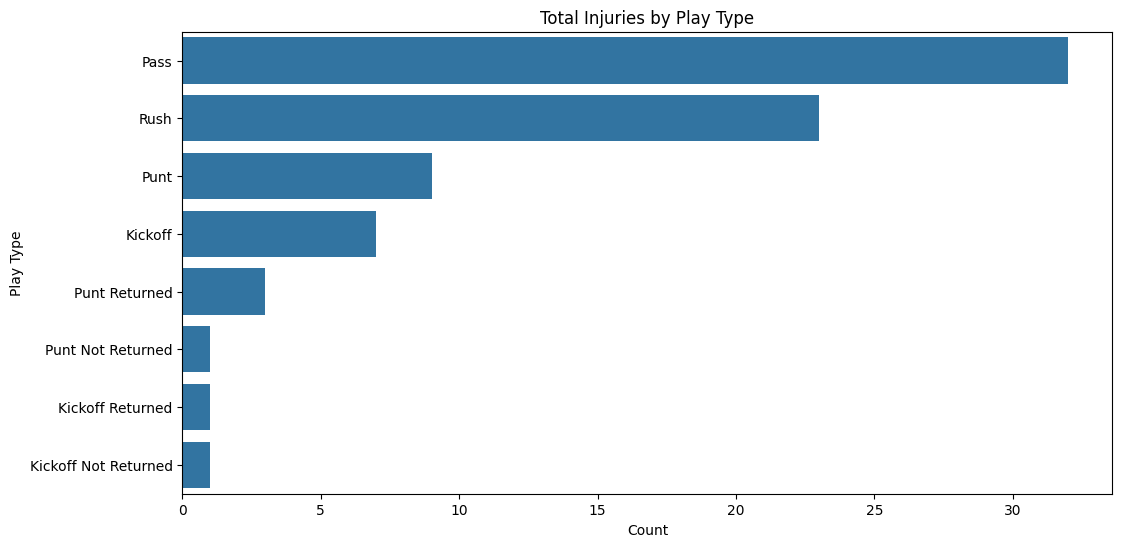

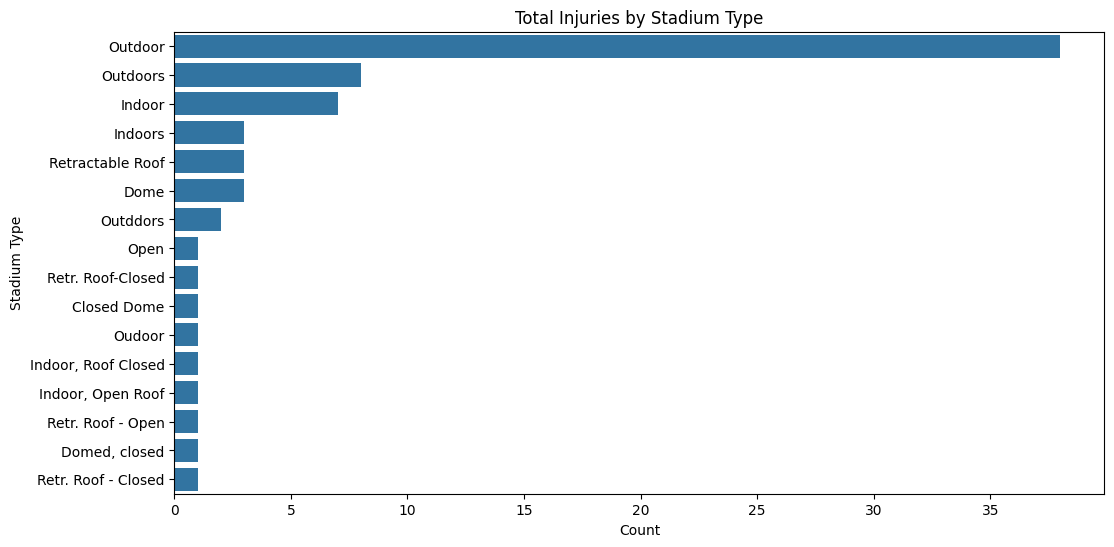

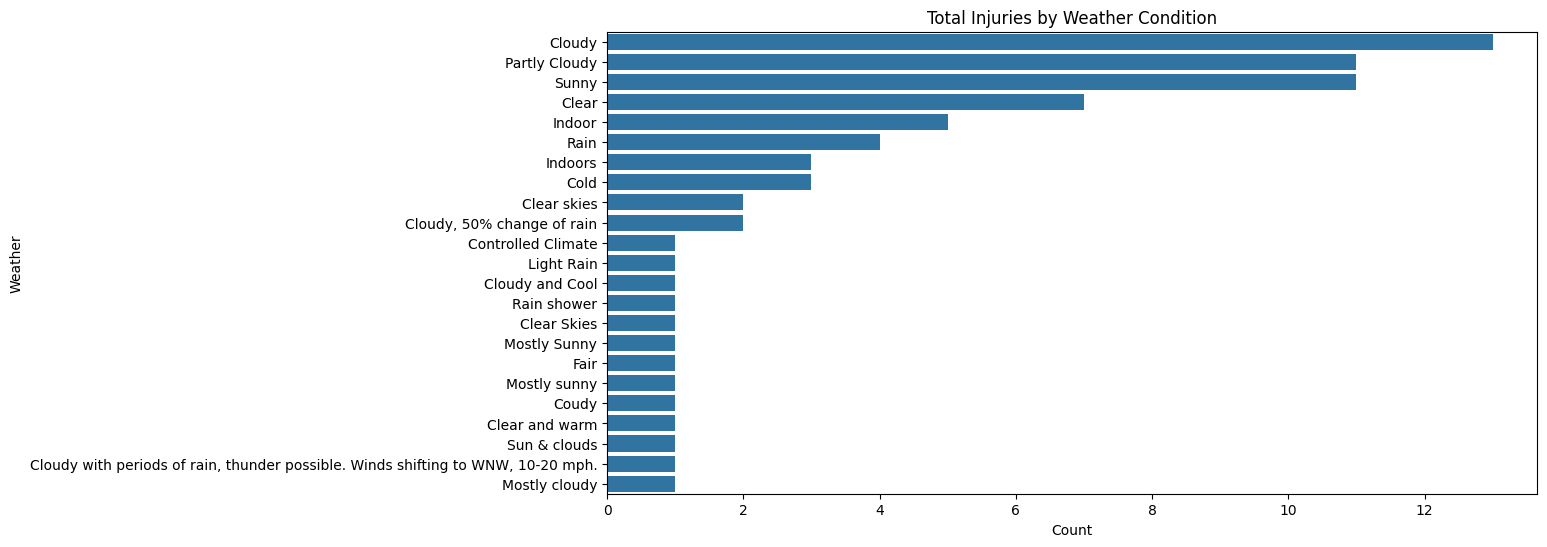

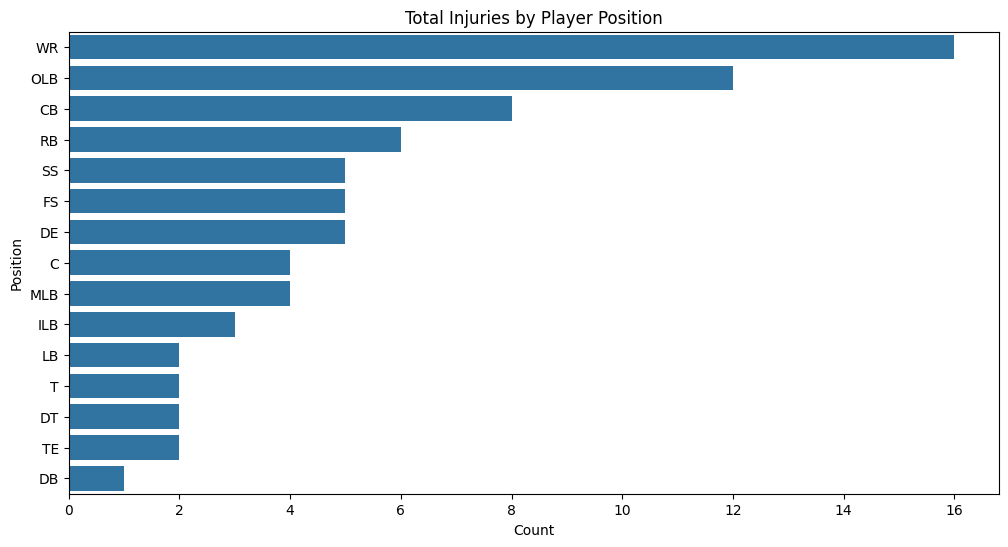

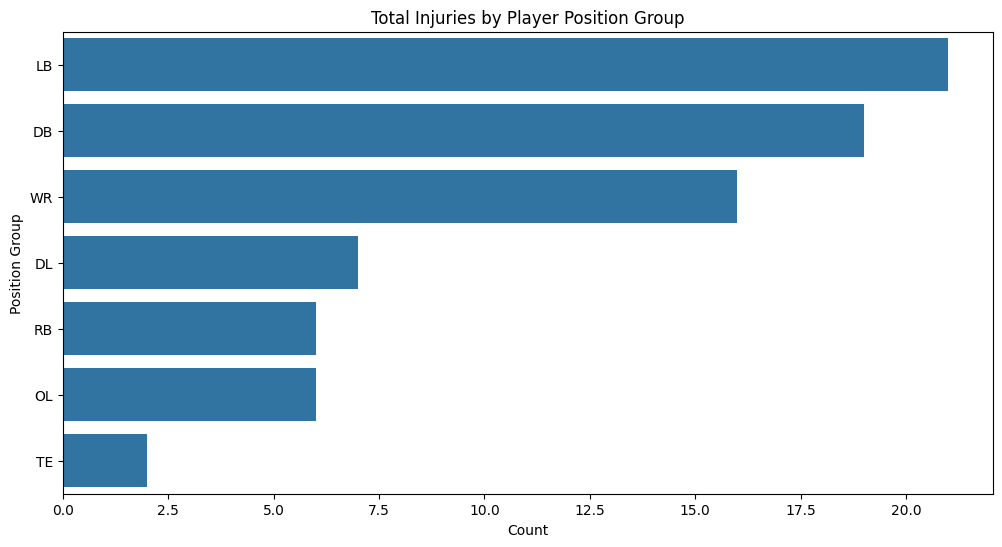

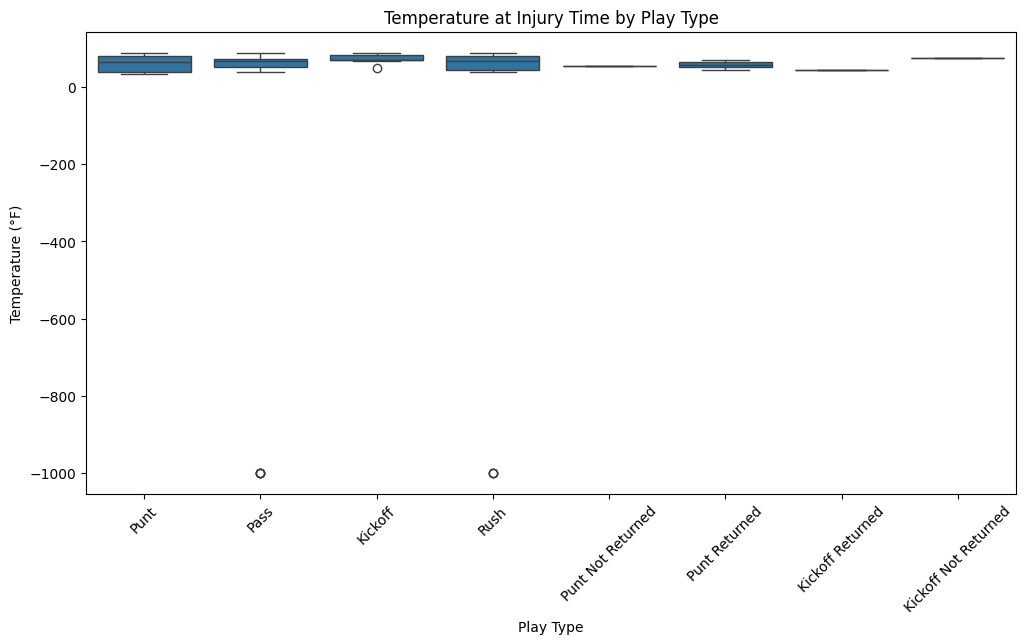

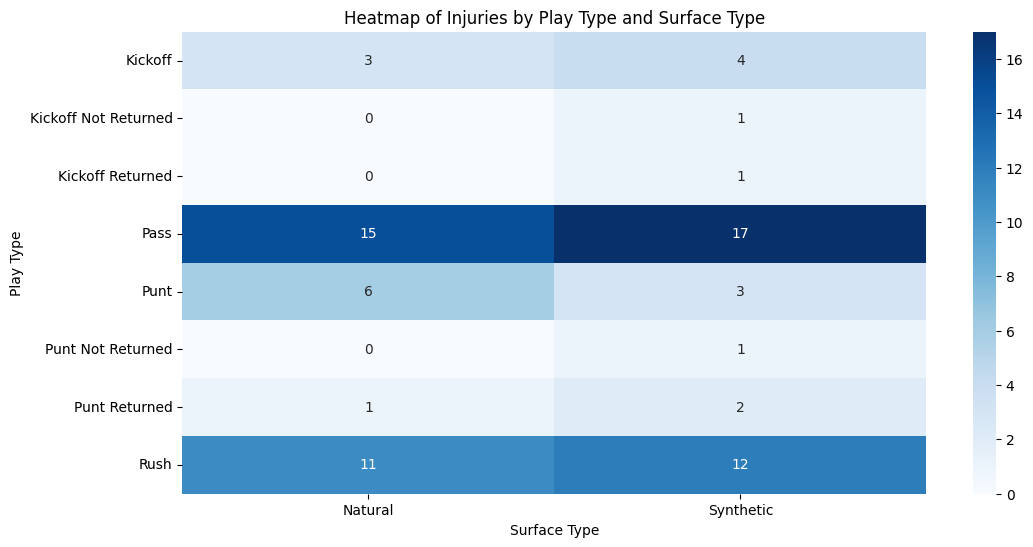

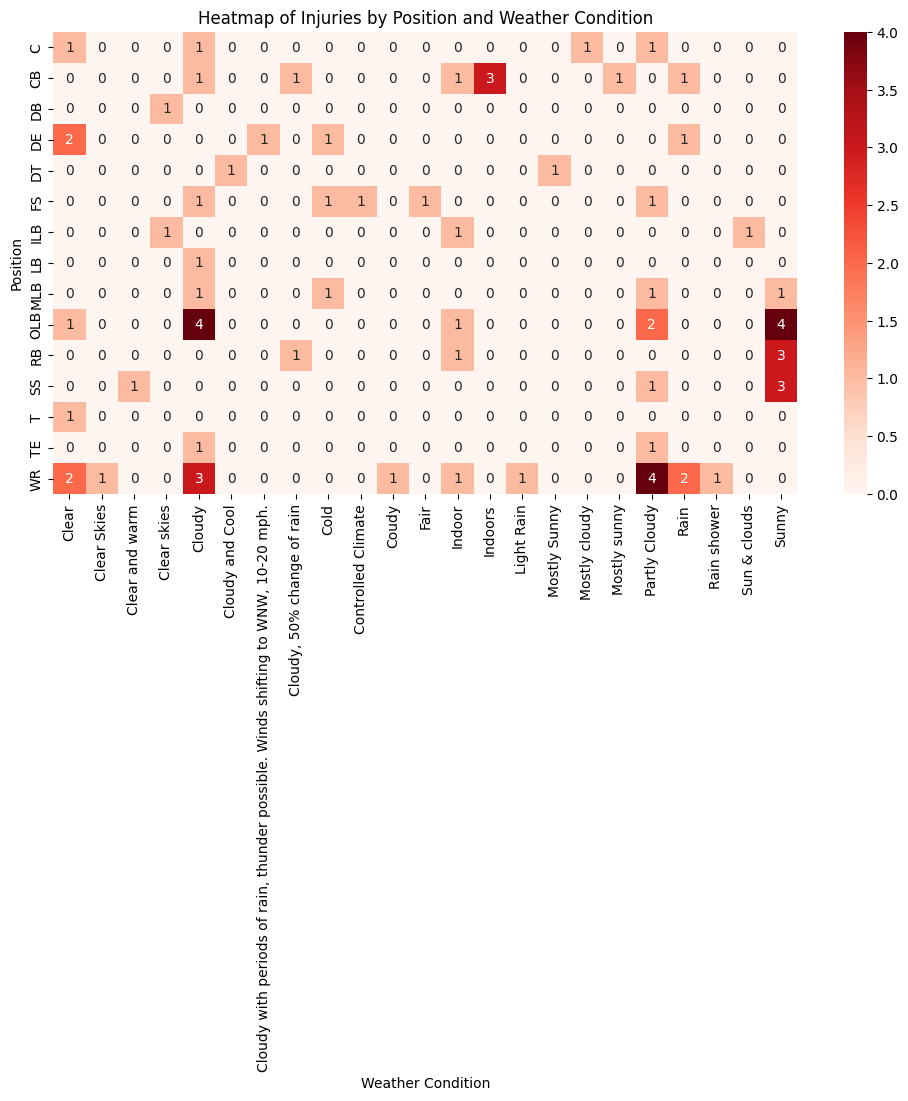

Summary Statistics for PlayerGamePlay by PlayType:
                      count       mean        std   min    25%   50%    75%  \
PlayType                                                                      
Kickoff                 7.0  19.000000  23.014488   1.0   8.50  10.0  18.00   
Kickoff Not Returned    1.0   1.000000        NaN   1.0   1.00   1.0   1.00   
Kickoff Returned        1.0   3.000000        NaN   3.0   3.00   3.0   3.00   
Pass                   32.0  30.187500  18.617435   2.0  15.75  28.0  41.25   
Punt                    9.0  15.555556  11.695203   2.0   6.00  16.0  26.00   
Punt Not Returned       1.0  55.000000        NaN  55.0  55.00  55.0  55.00   
Punt Returned           3.0  22.000000   9.848858  14.0  16.50  19.0  26.00   
Rush                   23.0  26.956522  22.357586   1.0   9.00  21.0  43.00   

                       max  
PlayType                    
Kickoff               69.0  
Kickoff Not Returned   1.0  
Kickoff Returned       3.0  
Pass         

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(y=df_merged['PlayType'], order=df_merged['PlayType'].value_counts().index)
plt.title("Total Injuries by Play Type")
plt.xlabel("Count")
plt.ylabel("Play Type")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y=df_merged['StadiumType'], order=df_merged['StadiumType'].value_counts().index)
plt.title("Total Injuries by Stadium Type")
plt.xlabel("Count")
plt.ylabel("Stadium Type")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y=df_merged['Weather'], order=df_merged['Weather'].value_counts().index)
plt.title("Total Injuries by Weather Condition")
plt.xlabel("Count")
plt.ylabel("Weather")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y=df_merged['Position'], order=df_merged['Position'].value_counts().index)
plt.title("Total Injuries by Player Position")
plt.xlabel("Count")
plt.ylabel("Position")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y=df_merged['PositionGroup'], order=df_merged['PositionGroup'].value_counts().index)
plt.title("Total Injuries by Player Position Group")
plt.xlabel("Count")
plt.ylabel("Position Group")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x="PlayType", y="Temperature")
plt.xticks(rotation=45)
plt.title("Temperature at Injury Time by Play Type")
plt.xlabel("Play Type")
plt.ylabel("Temperature (°F)")
plt.show()

injury_pivot = df_merged.pivot_table(index='PlayType', columns='Surface', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(injury_pivot, annot=True, fmt="d", cmap="Blues")
plt.title("Heatmap of Injuries by Play Type and Surface Type")
plt.xlabel("Surface Type")
plt.ylabel("Play Type")
plt.show()

injury_pivot = df_merged.pivot_table(index='Position', columns='Weather', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(injury_pivot, annot=True, fmt="d", cmap="Reds")
plt.title("Heatmap of Injuries by Position and Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Position")
plt.show()

summary_stats = df_merged.groupby("PlayType")["PlayerGamePlay"].describe()
print("Summary Statistics for PlayerGamePlay by PlayType:")
print(summary_stats)


# NFL Injury Analysis

### Are the data what you expect? Are they usable?
- The dataset is mostly usable, containing structured information about injuries, play types, weather, surfaces, and positions.
- Unexpected findings:
  - Injuries were not more frequent on synthetic fields.
  - Special teams plays (kickoff, punt) had fewer injuries than expected.
  - Some temperature values seemed extreme, suggesting possible errors.

### What is the overall shape of the distribution?
- The injury count distribution is skewed, with certain body parts and positions having significantly more injuries than others.
- The PlayerGamePlay distribution is right-skewed, meaning more injuries happen later in the game.
- Temperature distribution appears normal except for outliers.
- Injury counts by play type are unevenly distributed, with passing and rushing plays having the highest injury rates.

### Are there any outliers present?
- Yes, several outliers were detected:
  - Temperature data had extreme values (negative or abnormally high).
  - Some injuries happened very late into games, possibly due to fatigue.
  - Certain weather conditions had very few recorded injuries.

### How does the distribution change across different groups?
- **Surface Type:** Injuries occur similarly on both natural and synthetic fields.
- **Position:** WRs, LBs, and DBs have higher injury rates. Linemen have fewer injuries.
- **Play Type:** Passing and rushing plays show the highest injury frequency. Kickoffs and punts have fewer injuries but might be more severe.

### What are the minimum and maximum values in the histograms?
- **Temperature:** Some negative values (likely errors). Maximum approached 100°F.
- **Injury Count by Body Part:** Few injuries recorded for foot and wrist. Knee and ankle injuries were the most common.
- **Play Counts Before Injury:** Some injuries occurred within the first few plays, while others happened after 50+ plays.

### How do bin sizes affect the histogram?
- Smaller bins reveal more detail about injury frequency.
- Larger bins smooth out variations but may hide patterns.
- Adjusting bins in temperature data helped separate outliers from normal values.

### Does the distribution appear normal?
- Injury counts per position are skewed, not normal.
- Temperature data appears mostly normal except for outliers.
- Play counts before injury are right-skewed, meaning more injuries occur later in games.
- Position-based injury risk varies significantly.

### Final Thoughts
- The dataset is mostly usable but needs some cleaning (e.g., temperature outliers).
- The distribution is skewed in most cases, especially for injuries by position and play type.
- Further analysis could focus on injury severity (e.g., games missed by play type or surface).


# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

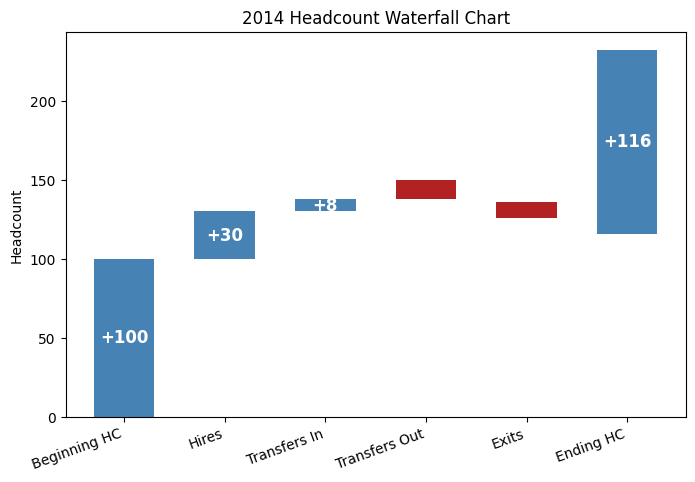

In [10]:
import matplotlib.pyplot as plt
import numpy as np

categories = ["Beginning HC", "Hires", "Transfers In", "Transfers Out", "Exits", "Ending HC"]
values = [100, 30, 8, -12, -10, 116]

cumulative = [values[0]]
for val in values[1:-1]:
    cumulative.append(cumulative[-1] + val)
cumulative.append(values[-1])

positions = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(8, 5))
for i in range(len(values)):
    bottom = cumulative[i-1] if i > 0 else 0 
    height = values[i]
    color = "steelblue" if height >= 0 else "firebrick"
    ax.bar(positions[i], abs(height), width=0.6, color=color, bottom=bottom)

    ax.text(positions[i], bottom + height/2, f"{values[i]:+}", ha="center", va="center", color="white", fontsize=12, fontweight="bold")
ax.set_xticks(positions)
ax.set_xticklabels(categories, rotation=20, ha="right")
ax.set_ylabel("Headcount")
ax.set_title("2014 Headcount Waterfall Chart")

plt.show()


# NFL Punt Analytics

In [ ]:
import pandas as pd

# Define file paths
base_path = "/Users/chrismckee/Downloads/"

# Load datasets
punt_game_data = pd.read_csv(base_path + "punt_game_data.csv")
punt_play_data = pd.read_csv(base_path + "punt_play_data.csv")
punt_player_data = pd.read_csv(base_path + "punt_player_data.csv")
punt_play_role_data = pd.read_csv(base_path + "punt_player_role_data.csv")
punt_video_review = pd.read_csv(base_path + "punt_video_review.csv")

In [ ]:
# Drop duplicate "Season_Year" columns before merging
punt_play_data = punt_play_data.drop(columns=["Season_Year"], errors="ignore")
punt_video_review = punt_video_review.drop(columns=["Season_Year"], errors="ignore")
punt_game_data = punt_game_data.drop(columns=["Season_Year"], errors="ignore")

# Merge Video Review (concussion dataset) with Play Data
concussion_plays = punt_play_data.merge(punt_video_review, on=["GameKey", "PlayID"], how="inner")

# Merge with Game Data for additional details
concussion_plays = concussion_plays.merge(punt_game_data, on=["GameKey"], how="left")

# Merge with Player Data to get player details
concussion_plays = concussion_plays.merge(punt_player_data, on=["GSISID"], how="left")

# Merge with Play Role Data to understand player actions
concussion_plays = concussion_plays.merge(punt_play_role_data, on=["GameKey", "PlayID", "GSISID"], how="left")

# Check merged concussion dataset
print(concussion_plays.head())


  Season_Type_x  GameKey Game_Date_x  Week_x  PlayID Game_Clock YardLine  \
0           Pre        5  08/11/2016       2    3129      03:44   CHI 31   
1           Pre        5  08/11/2016       2    3129      03:44   CHI 31   
2           Pre       21  08/20/2016       3    2587      05:52   TEN 45   
3           Pre       29  08/19/2016       3     538      04:46   NYJ 22   
4           Pre       45  08/27/2016       4    1212      08:29   NYG 46   

   Quarter Play_Type Poss_Team  ...         Stadium StadiumType       Turf  \
0        3      Punt       CHI  ...   Soldier Field     Outdoor      Grass   
1        3      Punt       CHI  ...   Soldier Field     Outdoor      Grass   
2        3      Punt       CAR  ...  Nissan Stadium    Outdoors      Grass   
3        1      Punt       NYJ  ...      FedExField     Outside      Grass   
4        2      Punt       NYG  ...         MetLife     Outdoor  FieldTurf   

                         GameWeather Temperature OutdoorWeather Number  \


In [ ]:
punt_merged_df = punt_play_data.merge(punt_game_data, on="GameKey", how="left")

punt_merged_df = punt_merged_df.merge(punt_play_role_data, on=["GameKey", "PlayID"], how="left")

punt_merged_df = punt_merged_df.merge(punt_player_data, on="GSISID", how="left")

punt_merged_df = punt_merged_df.merge(punt_video_review, on=["GameKey", "PlayID", "GSISID"], how="left")

print(punt_merged_df.info())

# punt_merged_df.to_csv(base_path + "punt_merged_df.csv", index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216885 entries, 0 to 216884
Data columns (total 40 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Season_Type_x                     216885 non-null  object 
 1   GameKey                           216885 non-null  int64  
 2   Game_Date_x                       216885 non-null  object 
 3   Week_x                            216885 non-null  int64  
 4   PlayID                            216885 non-null  int64  
 5   Game_Clock                        216885 non-null  object 
 6   YardLine                          216885 non-null  object 
 7   Quarter                           216885 non-null  int64  
 8   Play_Type                         216885 non-null  object 
 9   Poss_Team                         216885 non-null  object 
 10  Home_Team_Visit_Team              216885 non-null  object 
 11  Score_Home_Visiting               216885 non-null  o

/var/folders/wc/1x9439wd4g33gy6gn32jh7bw0000gn/T/ipykernel_36565/4215808545.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Turf", data=concussion_only_df, palette="Reds")


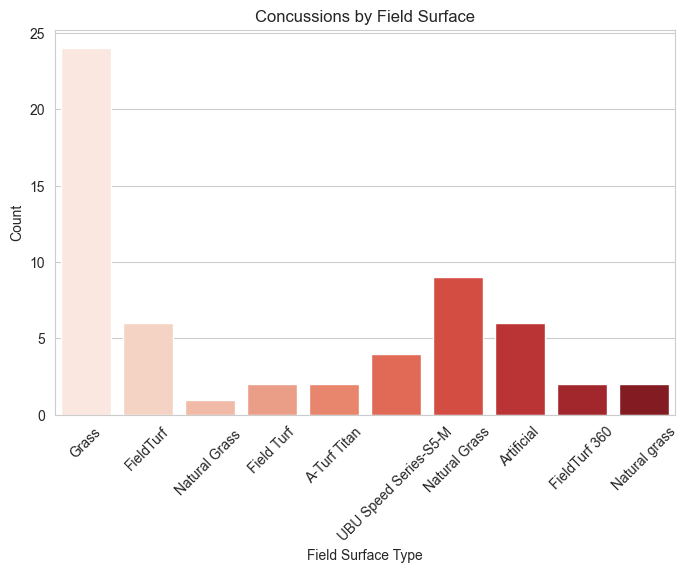

In [ ]:
# Filter dataset to include only plays that are in the video review file (which means they are concussion plays)
concussion_only_df = punt_merged_df[punt_merged_df["Primary_Impact_Type"].notnull()]

# Field Surface and Concussions (only showing concussion plays)
plt.figure(figsize=(8, 5))
sns.countplot(x="Turf", data=concussion_only_df, palette="Reds")
plt.title("Concussions by Field Surface")
plt.xlabel("Field Surface Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


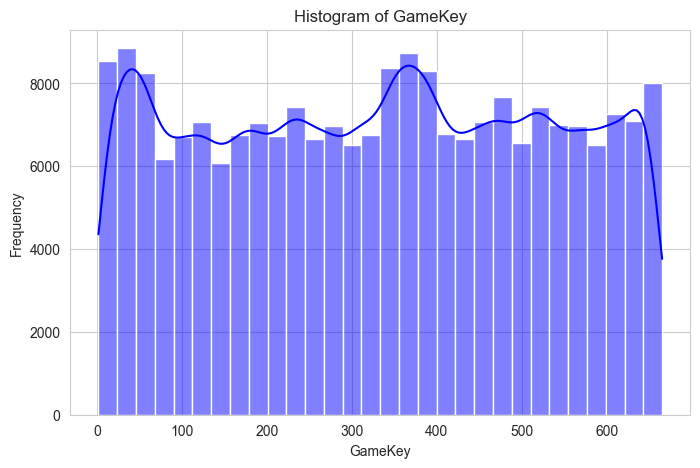

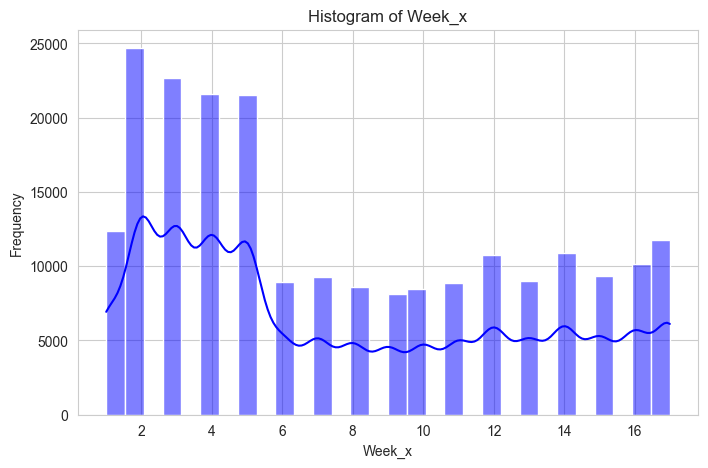

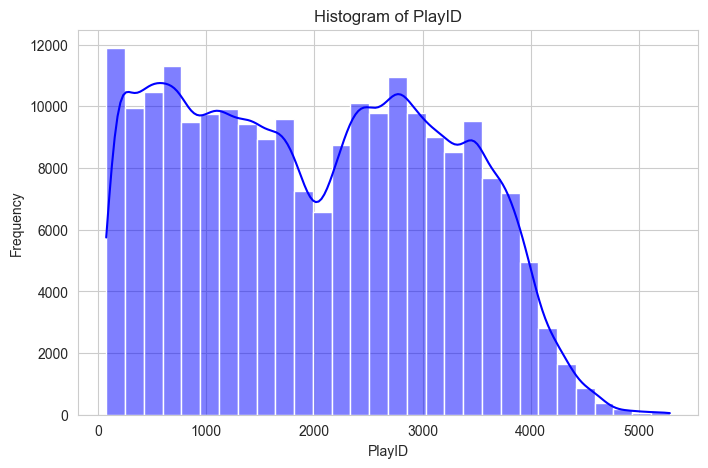

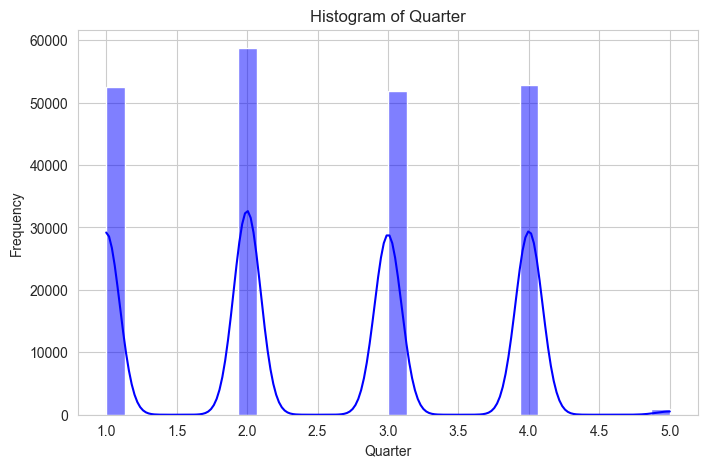

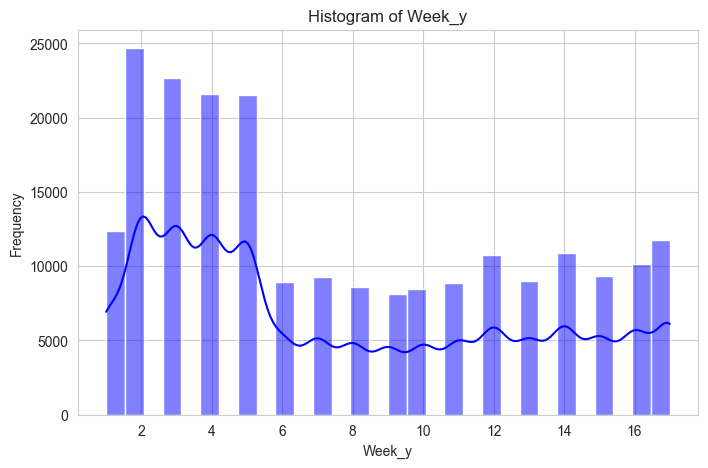

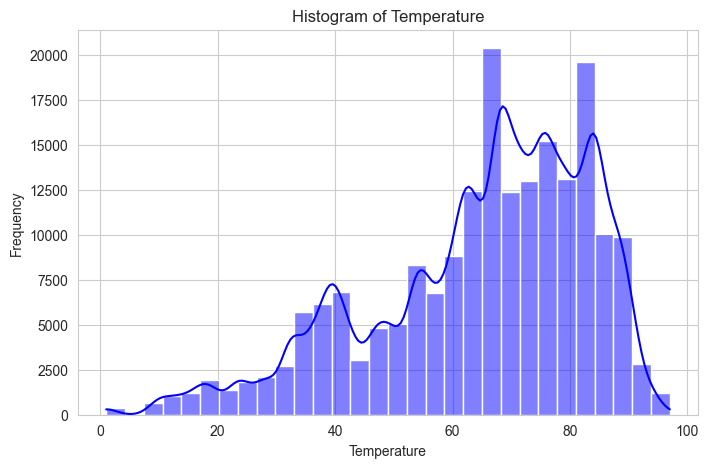

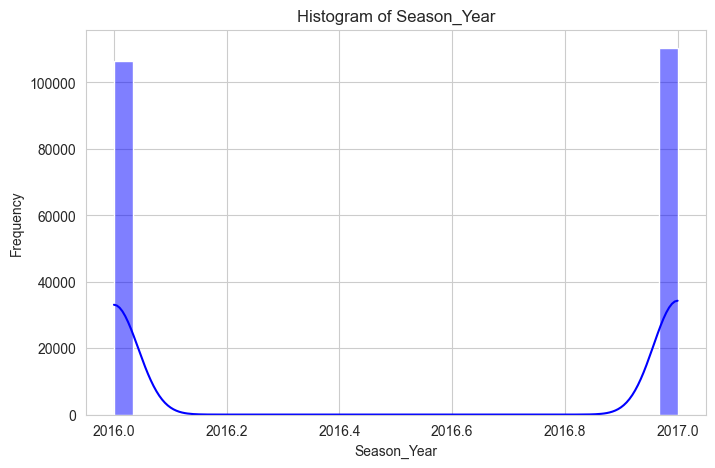

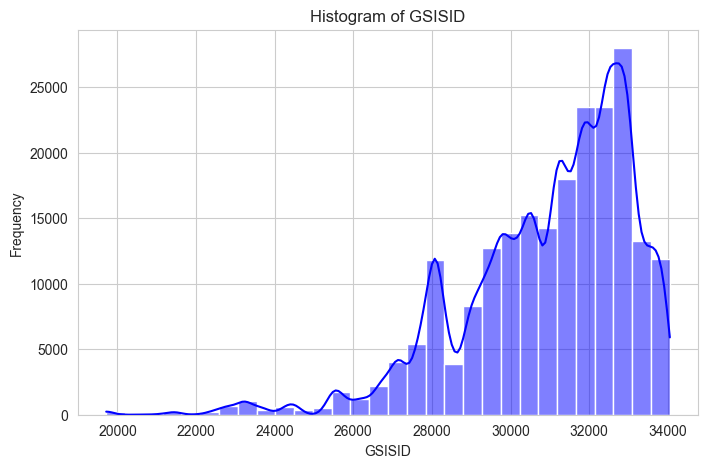

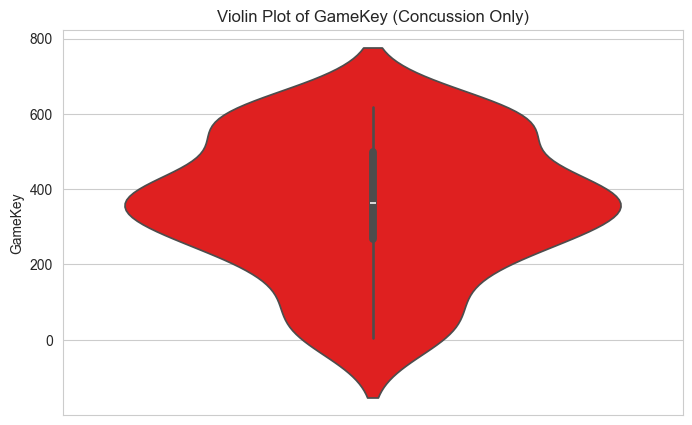

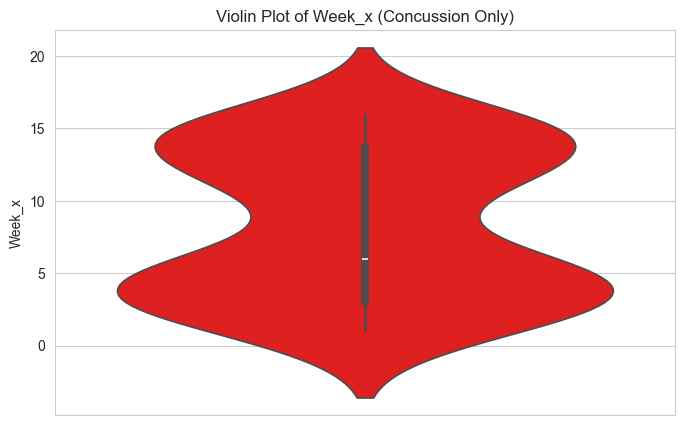

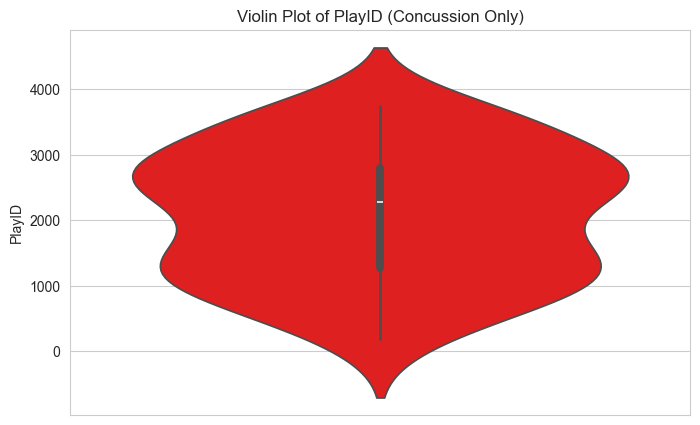

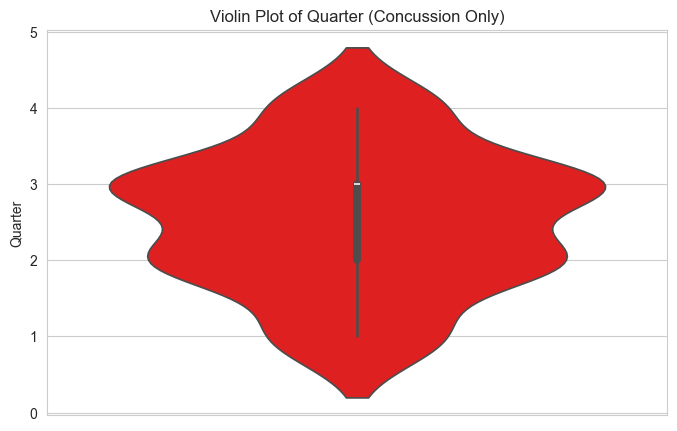

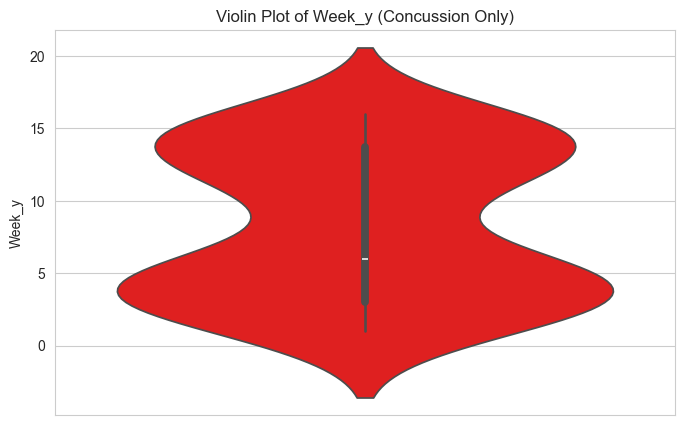

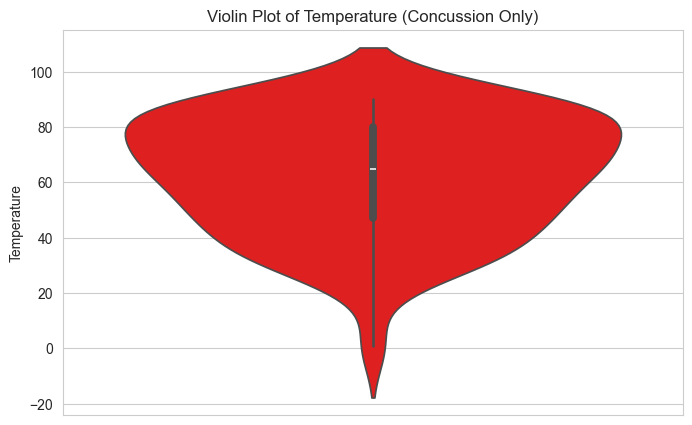

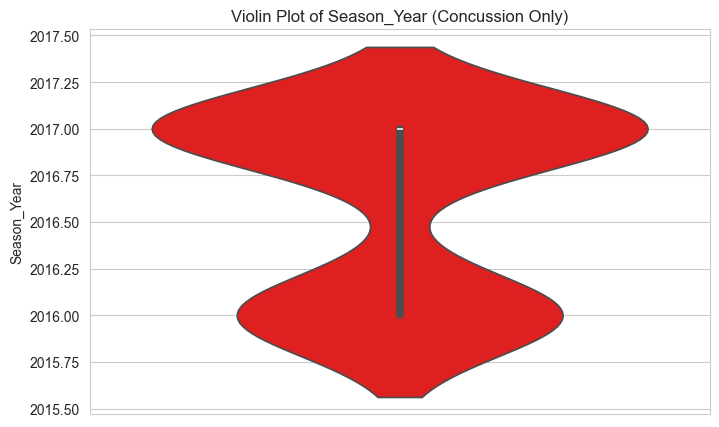

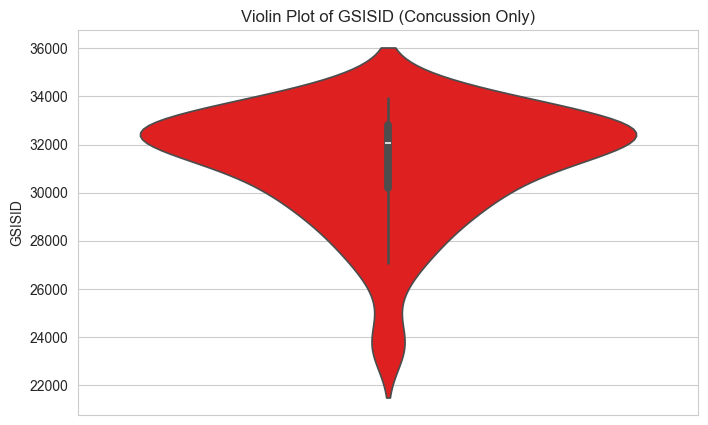

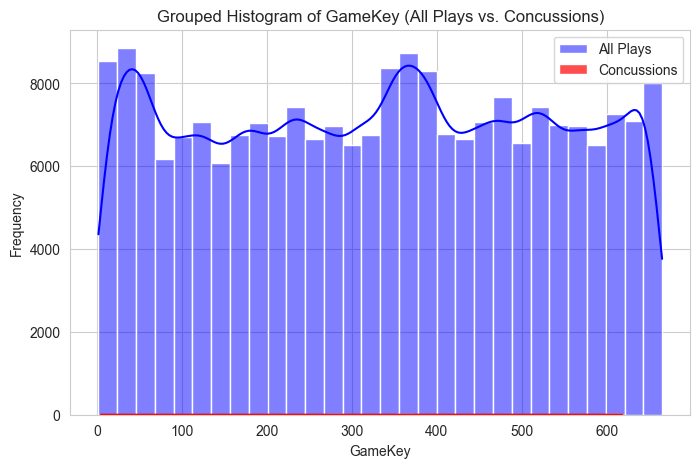

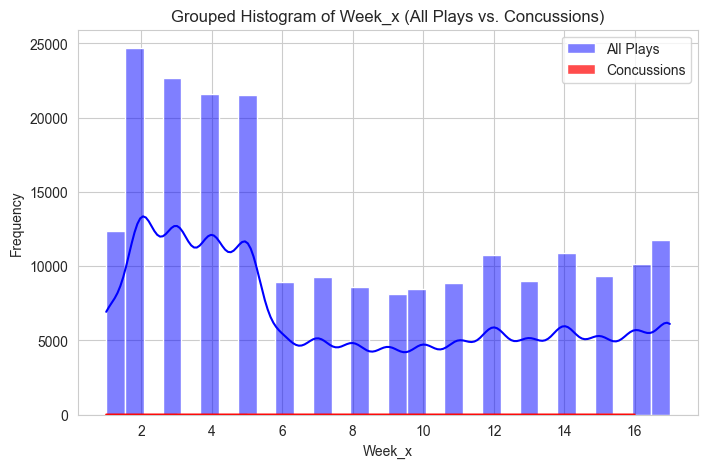

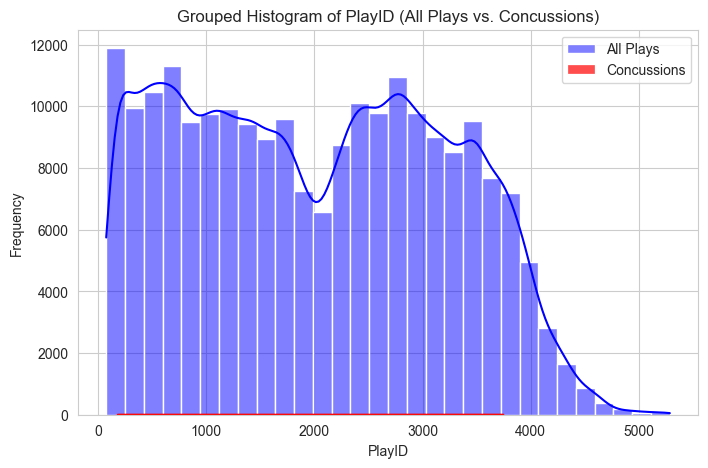

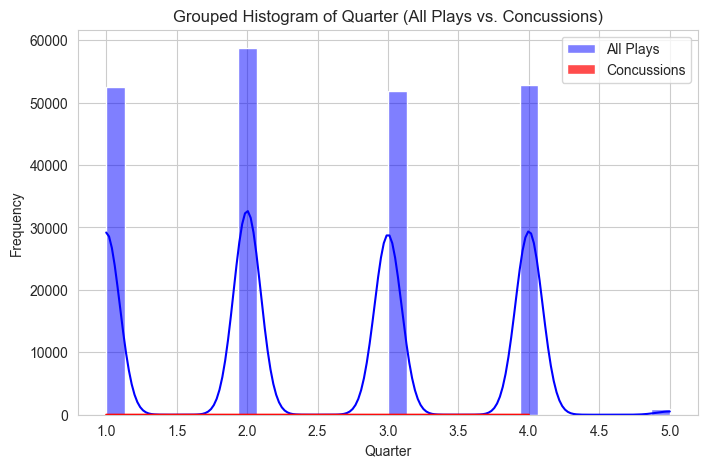

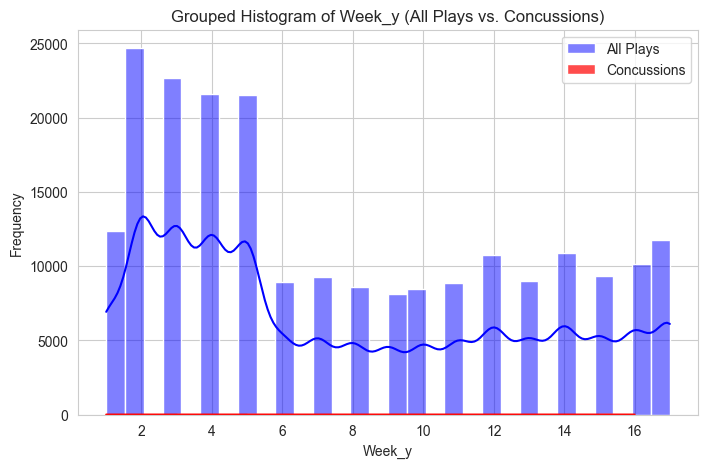

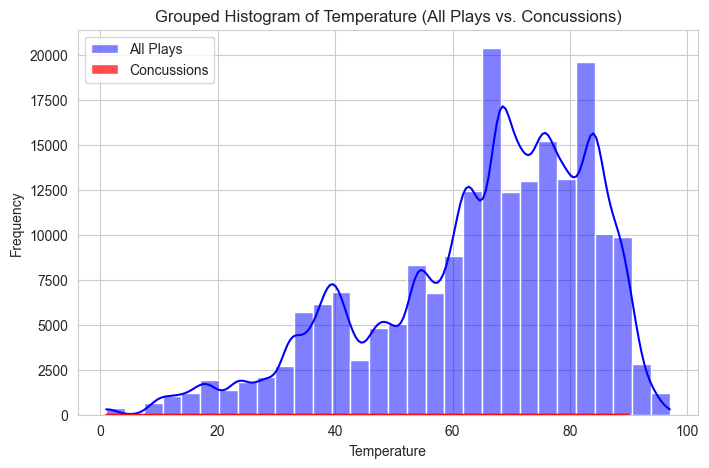

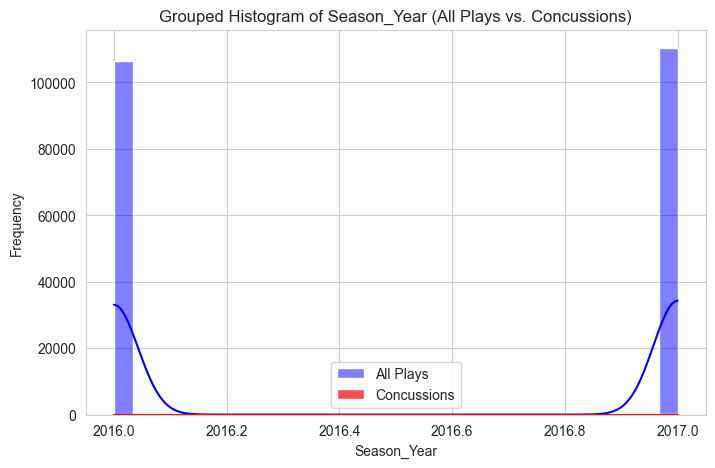

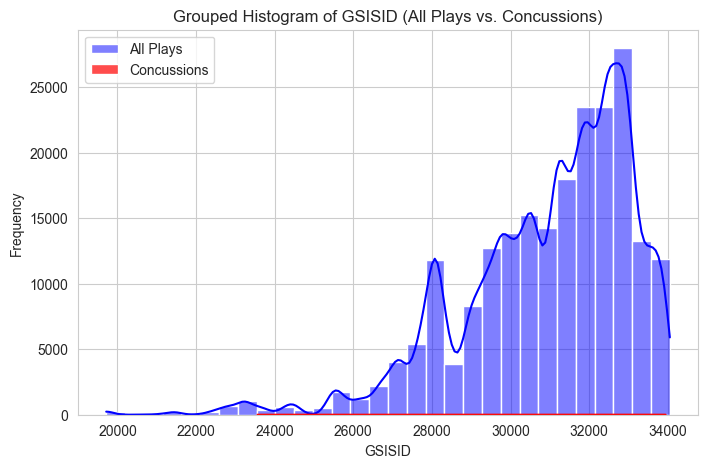

/var/folders/wc/1x9439wd4g33gy6gn32jh7bw0000gn/T/ipykernel_36565/2548708778.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=punt_merged_df[col], order=punt_merged_df[col].value_counts().index, palette="viridis")


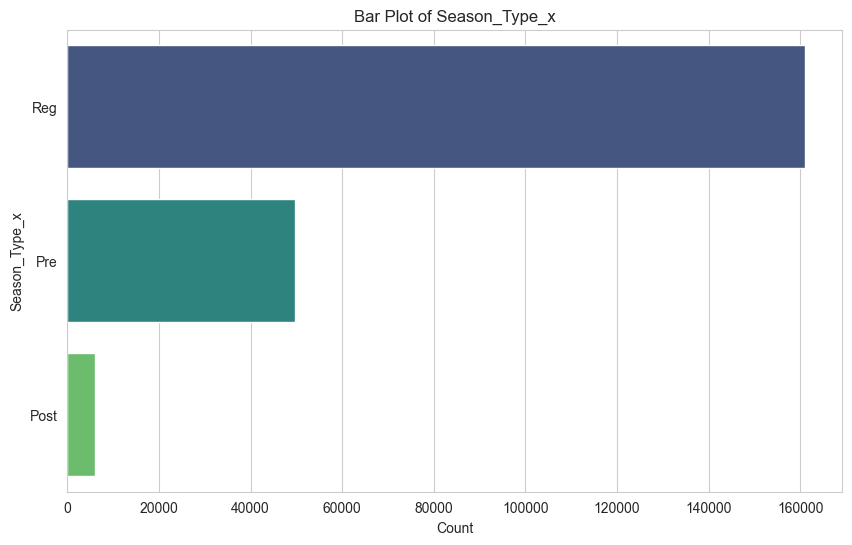

/var/folders/wc/1x9439wd4g33gy6gn32jh7bw0000gn/T/ipykernel_36565/2548708778.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=punt_merged_df[col], order=punt_merged_df[col].value_counts().index, palette="viridis")


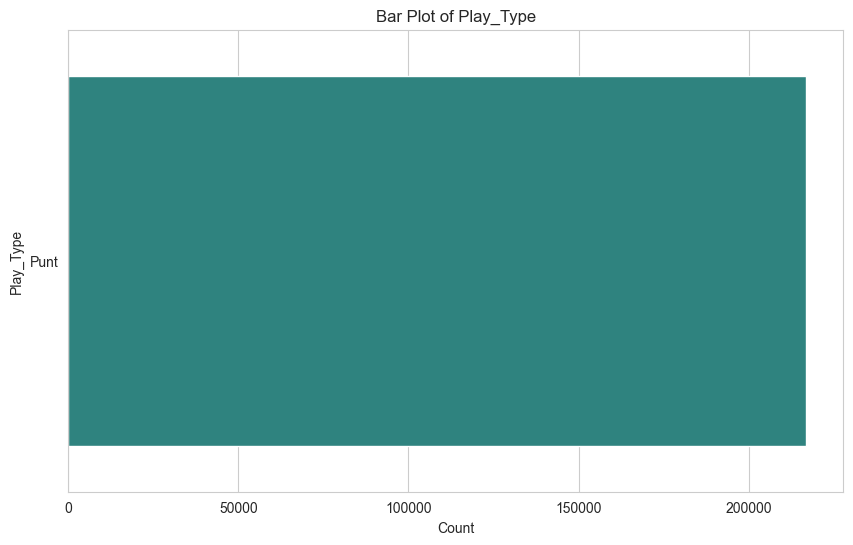

/var/folders/wc/1x9439wd4g33gy6gn32jh7bw0000gn/T/ipykernel_36565/2548708778.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=punt_merged_df[col], order=punt_merged_df[col].value_counts().index, palette="viridis")


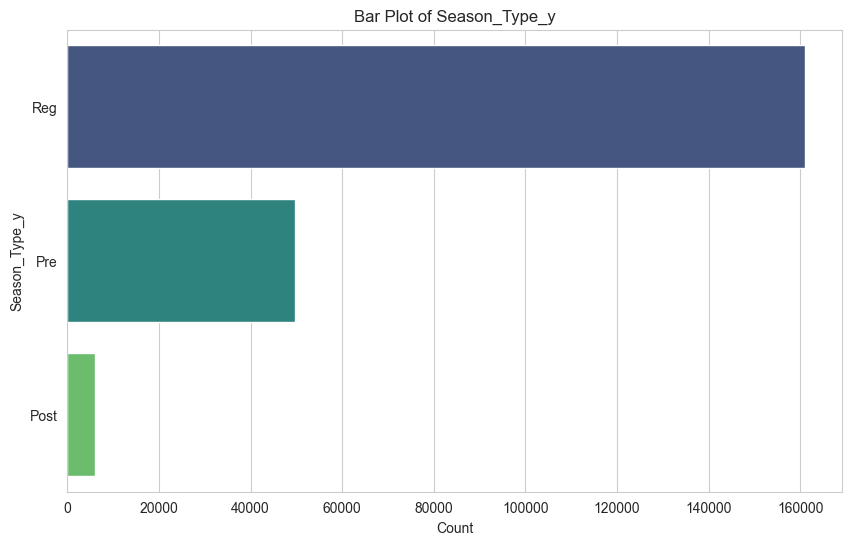

/var/folders/wc/1x9439wd4g33gy6gn32jh7bw0000gn/T/ipykernel_36565/2548708778.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=punt_merged_df[col], order=punt_merged_df[col].value_counts().index, palette="viridis")


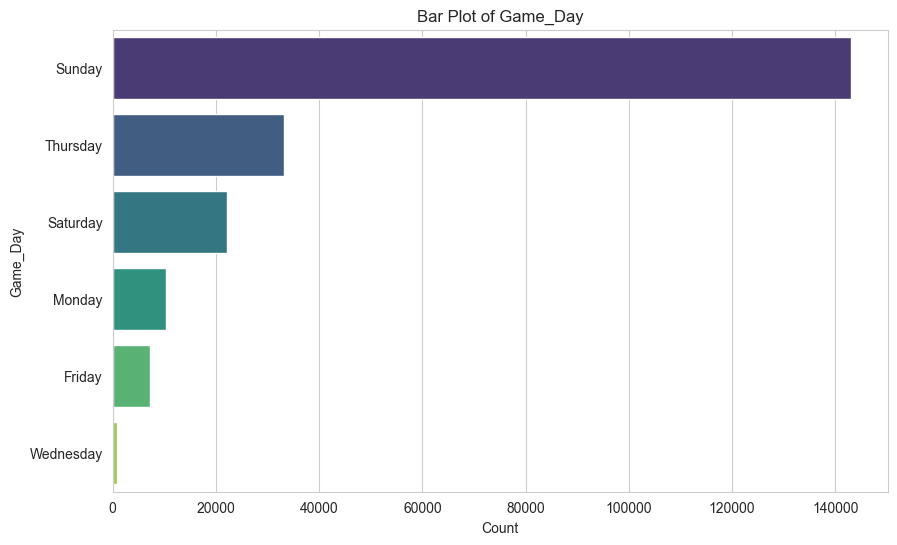

/var/folders/wc/1x9439wd4g33gy6gn32jh7bw0000gn/T/ipykernel_36565/2548708778.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=punt_merged_df[col], order=punt_merged_df[col].value_counts().index, palette="viridis")


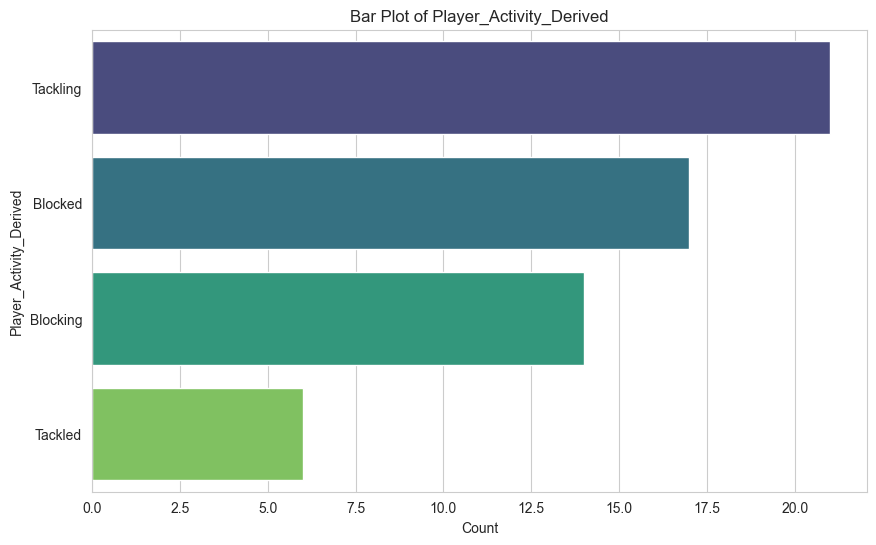

/var/folders/wc/1x9439wd4g33gy6gn32jh7bw0000gn/T/ipykernel_36565/2548708778.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=punt_merged_df[col], order=punt_merged_df[col].value_counts().index, palette="viridis")


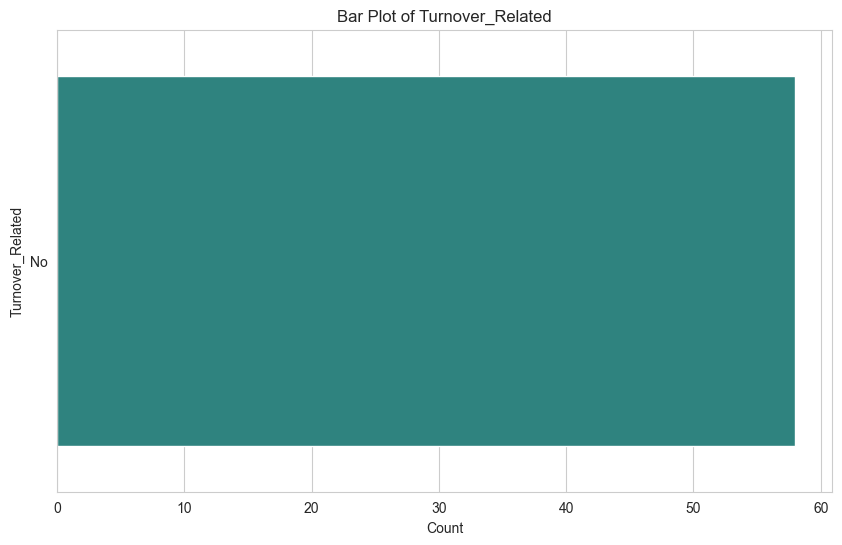

/var/folders/wc/1x9439wd4g33gy6gn32jh7bw0000gn/T/ipykernel_36565/2548708778.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=punt_merged_df[col], order=punt_merged_df[col].value_counts().index, palette="viridis")


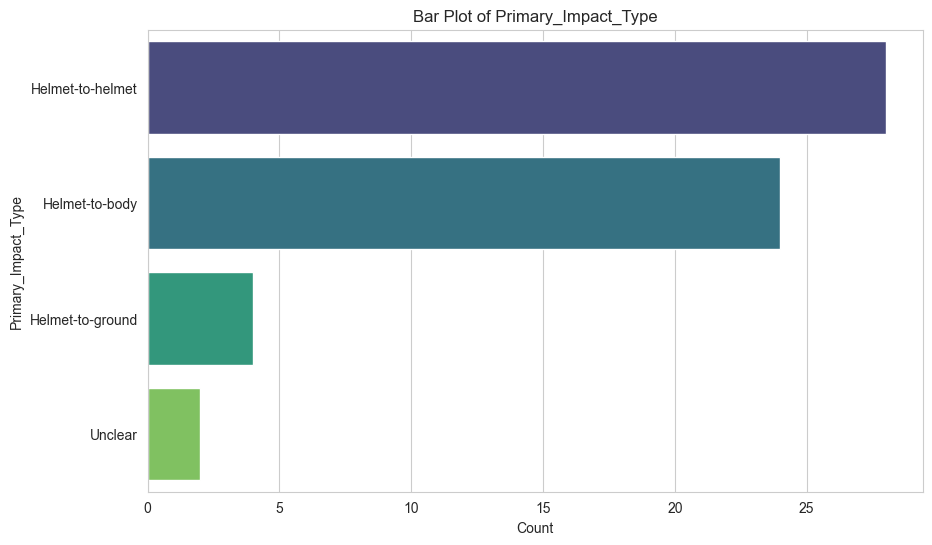

/var/folders/wc/1x9439wd4g33gy6gn32jh7bw0000gn/T/ipykernel_36565/2548708778.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=punt_merged_df[col], order=punt_merged_df[col].value_counts().index, palette="viridis")


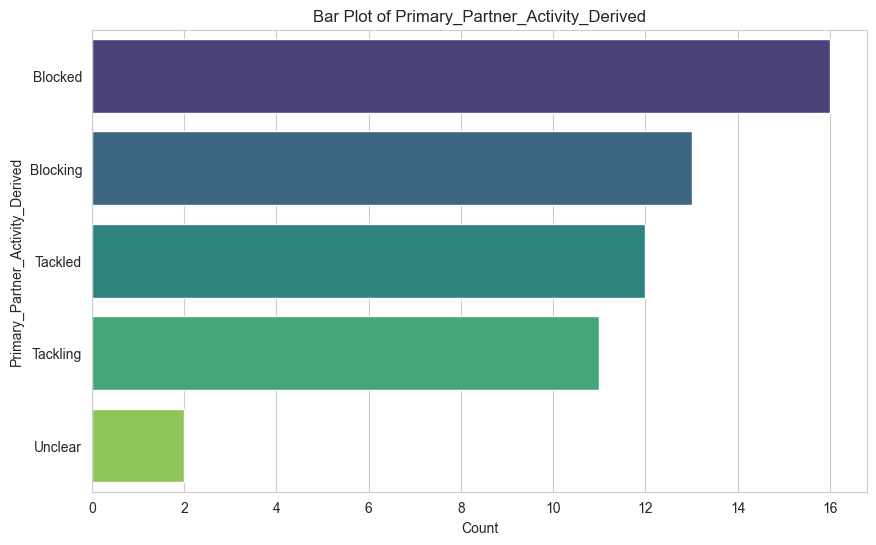

/var/folders/wc/1x9439wd4g33gy6gn32jh7bw0000gn/T/ipykernel_36565/2548708778.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=punt_merged_df[col], order=punt_merged_df[col].value_counts().index, palette="viridis")


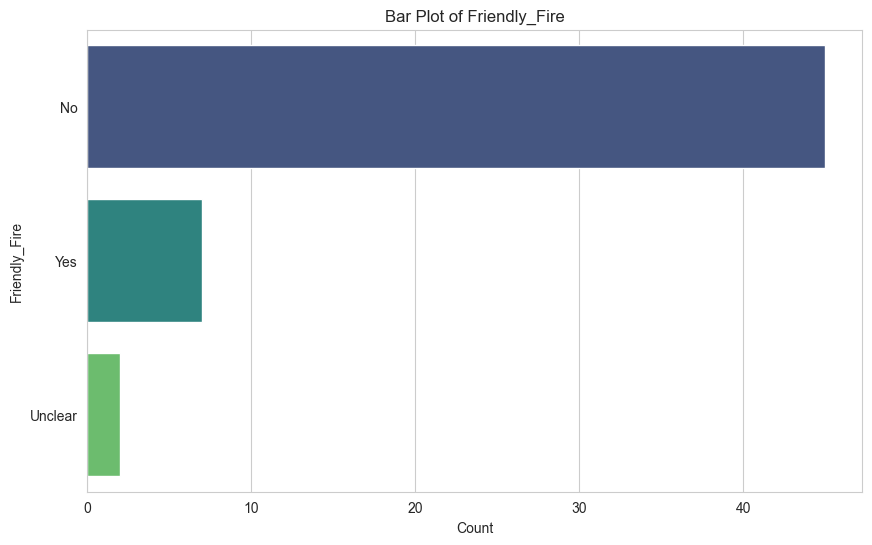


### Mean Values ###
 GameKey          331.589455
Week_x             7.678936
PlayID          2021.827254
Quarter            2.497697
Week_y             7.678936
Temperature       64.722536
Season_Year     2016.509028
GSISID         30934.033992
dtype: float64

### Median Values ###
 GameKey          339.0
Week_x             6.0
PlayID          2001.0
Quarter            2.0
Week_y             6.0
Temperature       68.0
Season_Year     2017.0
GSISID         31363.0
dtype: float64

### Mode Values ###
 GameKey          646.0
Week_x             2.0
PlayID           125.0
Quarter            2.0
Week_y             2.0
Temperature       68.0
Season_Year     2017.0
GSISID         28121.0
Name: 0, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a style for the plots
sns.set_style("whitegrid")

# Define numeric columns for analysis
numeric_columns = punt_merged_df.select_dtypes(include=[np.number]).columns

# Draw histograms for each numeric column in punt_merged_df
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(punt_merged_df[col], bins=30, kde=True, color="blue")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Draw violin plots for each numeric column in concussion_only_df
for col in numeric_columns:
    if col in concussion_only_df.columns:
        plt.figure(figsize=(8, 5))
        sns.violinplot(y=concussion_only_df[col], color="red")
        plt.title(f"Violin Plot of {col} (Concussion Only)")
        plt.ylabel(col)
        plt.show()

# Draw grouped histograms: Concussion vs. Non-Concussion for numeric columns
for col in numeric_columns:
    if col in concussion_only_df.columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(punt_merged_df[col], bins=30, kde=True, color="blue", label="All Plays", alpha=0.5)
        sns.histplot(concussion_only_df[col], bins=30, kde=True, color="red", label="Concussions", alpha=0.7)
        plt.title(f"Grouped Histogram of {col} (All Plays vs. Concussions)")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()

# Draw a bar plot for categorical variables in punt_merged_df
categorical_columns = punt_merged_df.select_dtypes(include=["object"]).columns
for col in categorical_columns:
    if punt_merged_df[col].nunique() < 20:  # Avoid plotting too many unique categories
        plt.figure(figsize=(10, 6))
        sns.countplot(y=punt_merged_df[col], order=punt_merged_df[col].value_counts().index, palette="viridis")
        plt.title(f"Bar Plot of {col}")
        plt.xlabel("Count")
        plt.ylabel(col)
        plt.show()

# Calculate means, medians, and modes for numeric columns
mean_values = punt_merged_df[numeric_columns].mean()
median_values = punt_merged_df[numeric_columns].median()
mode_values = punt_merged_df[numeric_columns].mode().iloc[0]

# Display summary statistics
print("\n### Mean Values ###\n", mean_values)
print("\n### Median Values ###\n", median_values)
print("\n### Mode Values ###\n", mode_values)


# NFL Concussion and Punt Play Analysis

## Are the data what you expect? Are they usable?
- The dataset is **mostly usable**, containing structured information about concussions, play types, player roles, weather, and field surfaces.
- **Unexpected findings:**
  - **Concussions are extremely rare**, occurring in only **~58 plays out of 216,885** (~0.03% of all punt plays).
  - **Turnover plays did not lead to significantly more concussions**, contradicting the assumption that high-impact turnover plays might pose greater risks.
  - **Concussions were most commonly caused by helmet-to-helmet impacts**, reinforcing concerns about player-to-player collisions.

## What is the overall shape of the distribution?
- **Punt Play Distribution:** Play types are **uniform** as all plays in the dataset are punts.
- **Concussions by Quarter:** Right-skewed, with most concussions happening in **Q2 and Q3**.
- **Temperature Distribution:** Appears **normal**, but with a few extreme outliers.
- **Concussions by Player Role:** Unevenly distributed, with **gunners and returners experiencing the highest rates of concussions**.
- **Primary Impact Type:** Most concussions were from **helmet-to-helmet impacts**, with fewer from **helmet-to-ground or helmet-to-body impacts**.

## Are there any outliers present?
- **Yes, several outliers were detected:**
  - **Temperature data had extreme values**, ranging from **1°F to 97°F**, with some potential errors.
  - **Some players experienced multiple concussions**, which could indicate repeat injury risks.
  - **Certain surface types (e.g., “Unknown” and “Other”) had very few recorded concussions**, making their impact difficult to analyze.

## How does the distribution change across different groups?
- **Surface Type:** Concussions occurred on both **natural and synthetic fields**, but there was **no strong trend favoring one over the other**.
- **Position & Player Role:**  
  - **Gunners, returners, and blockers were at the highest risk of concussions.**  
  - **Punters and linemen had the lowest concussion rates**, likely due to their roles involving fewer direct collisions.
- **Primary Impact Type:**  
  - **Helmet-to-helmet impacts accounted for the majority of concussions.**  
  - **Helmet-to-ground impacts were the second most common, followed by helmet-to-body.**

## What are the minimum and maximum values in the histograms?
- **Temperature:**
  - Minimum: **1°F** (possible data error).
  - Maximum: **97°F**.
- **Concussions by Player Role:**  
  - Some roles (e.g., **punt protectors, punters**) had **0 concussions**.
  - Others (e.g., **gunners, returners**) had the highest numbers.
- **Play Quarter Distribution:**  
  - No concussions recorded in **Overtime (OT)**.

## How do bin sizes affect the histogram?
- **Smaller bins** revealed more **granular details** about concussion frequency, but also introduced more noise.
- **Larger bins** provided **a smoother view** of concussion trends but sometimes **masked variability** in player roles and field surfaces.
- In **temperature data**, adjusting the bin size **helped separate extreme cold weather games from normal conditions**.

## Does the distribution appear normal?
- **Punt Play Distribution:** Uniform (since the dataset only contains punts).
- **Temperature Data:** Appears mostly **normal**, but contains **outliers**.
- **Concussions by Quarter:** Right-skewed, with **most concussions happening in Q2 and Q3**.
- **Concussions by Role & Surface Type:** Skewed due to certain positions and surfaces having **significantly fewer concussion occurrences**.

## Final Thoughts
- The dataset is **mostly usable** but has some **data inconsistencies and missing values**, particularly in weather and field surface data.
- **Concussions are extremely rare events**, requiring a focus on high-risk groups like **gunners and returners** for meaningful analysis.
- The dataset confirms that **helmet-to-helmet impacts are the primary cause of concussions**, reinforcing the need for stricter rule enforcement and helmet safety measures.
- Further analysis could explore **injury severity (e.g., how many games were missed due to concussions)** and whether **rule changes have reduced concussion rates over time**.
